# All Standardization and Transformation technique

## Why Transformation of features is required?
- In Linear regression----to find-- Gradient descent ---and Global minima
- Logistic regression
- Used in Algorithm likes KNN< KMeans, Hierarichal clustering  ---- Eucledian Distance
- Every point has some vectors and Direction

f1 f2                 p1 = (x1,y1) = (30,70)  to transform this values in 0 to 1 we use MinMax Scaler
24 56                 p2 = (x2,y2) = (24,56)
21 100
45 67

## Deep learning
- ANN  ---->Global minina, gradient descent
- CNN  ---->we use 0 to 255 pixels we just divide it by 255.
- RNN  ----> scaling minmax scaler


# Types of Transformation
## 1) Normalization and Standardization
## 2) Scaling to Minimum and Maximum Values
## 3) Scaling to median and Quantiles
## 4) Gaussian Transformation
   #### 4.1) Logarithamic Transformation
   #### 4.2) Reciprocal Transformation
   #### 4.3) Square root Transformation
   #### 4.4) Exponential Transformation
   #### 4.5) Box cox Transformation

# 1) Standardization  (Mostly used for standard distribution...)
- we are trying to bring all the variables or features to similar scale. Standarization means centering the variable to zero.
- z= (x-x_mean)/std

In [1]:
import pandas as pd
df = pd.read_csv("titanic.csv", usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [3]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [4]:
df.isnull().sum()  # we filled nan values with median

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
#### Standarisation --> we use the standard scaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

#### fit vs fit_transform
#### fit --->> fit is only applied for training the data
#### fit_transofrm ---->> fit_transform is used to change/transform the data and training the data
df_scaled = scaler.fit_transform(df)

In [24]:
pd.DataFrame(df_scaled)

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [25]:
pd.DataFrame(df_scaled, columns = df.columns)

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

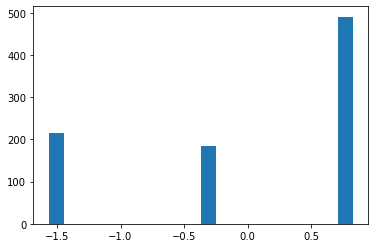

In [13]:
plt.hist(df_scaled[:,1], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

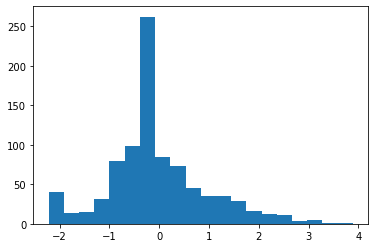

In [15]:
plt.hist(df_scaled[:,2], bins=20)  # here age had NAN Values we replaced them with mean(). so in middle we can see more values

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

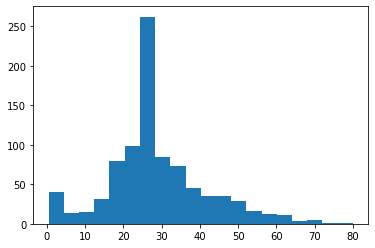

In [19]:
plt.hist(df['Age'], bins=20)  # Age with NAN VALUES

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

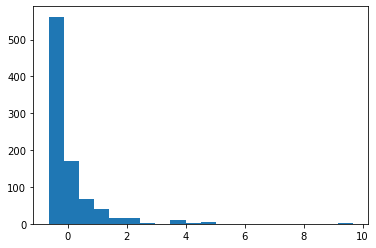

In [23]:
plt.hist(df_scaled[:,3], bins=20)

# next topic is MinMax scaling
